# Business Understanding


**Latar Belakang**

"Green Taxi" atau "Boro Taxis" atau selanjutnya kita akan sebut taksi hijau, merupakan bagian dari inisiatif yang dikenal sebagai "Borough Taxi Program" yang dimulai pada 2013 di kota New York. Taksi hijau diatur oleh NYC Taxi and Limousine Commission (TLC). Mereka beroperasi dengan aturan yang mirip dengan taksi kuning, tetapi dengan izin khusus untuk melayani wilayah-wilayah tertentu di luar Manhattan.

Analisis perjalanan menggunakan GPS oleh Komisi Taksi dan Limusin menemukan bahwa 95% penjemputan taksi kuning terjadi di Manhattan di bawah 96th Street dan di bandara JFK dan LaGuardia. Oleh karena itu adanya taksi hijau ini diharapkan mampu memenuhi permintaan akan taksi yang melebihi pasokan selama berjam-jam setiap hari diluar daerah padat tersebut, terutama di boroughs Brooklyn, Queens, The Bronx, dan Staten Island. Pada bulan Desember 2011, Gubernur Andrew Cuomo menandatangani undang-undang negara bagian yang mengesahkan Rencana Taksi Lima Wilayah yang mencakup 18.000 izin taksi boro baru dan penjualan 2.000 medali kuning baru, yang semuanya dapat diakses oleh kursi roda. Meskipun undang-undang tersebut akan membuat panggilan taksi livery di jalan menjadi legal, hal ini tidak disambut baik oleh beberapa pengemudi taksi livery dan politisi karena kekhawatiran bahwa biayanya akan terlalu mahal seperti yang terlihat pada medali taksi kuning yang dijual melalui lelang dengan rata-rata $700.000 masing-masing. Komisi Taksi dan Limusin mengklarifikasi bahwa izin taksi boro akan menelan biaya $1.500 dan berlaku selama tiga tahun. [disini](https://en.wikipedia.org/wiki/Boro_taxi)

Namun solusi dengan program taksi hijau tak semulus yang dikira. Fakta yang ada menunjukkan kemrosotan performa taksi hijau dibanding dengan taksi kuning. Berdasarkan laporan bulanan NYC TLC [disini]((https://www.nyc.gov/site/tlc/about/aggregated-reports.page)). Grafik yang ada menunjukkan sejak 2020 taksi hjau mengalami penurunan jumalh trip, penegmudi, dan armada hal ini berbanding terbalik dengan taksi kuning yang sempat drop di tahun 2020 dan terus naik di tahun berikutnya.

**Pernyataan Masalah**

Telah diuraikan pada latar belakang bahwa taksi hijau terus mengalami penurunan jumlah pengemudi dan armada bahkan sejak tahun 2015. Jika diawal kemunculan taksi hijau harapkan menjadi solusi kendaraan untuk wilayah yang tidak terjangkau oleh taksi kuning dengan biaya lisensi yang jauh lebih murah dibanding taksi kuning. Apakah taksi hijau masih terus bisa menjadi harapan kendaraan yang baik untuk jangkauan wilayah luar Manhattan dan bandara JFK dan LaGuardia?

**Batasan Masalah**

Untuk menjawab permasalahan diatas kami menggunakan data trip record TLC NYC periode Januari 2023 [disini](https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page)

**Tujuan**

Analisa ini diharapkan mampu menjawab pernyataan masalah diatas serta menjadi acuan NYC Taxi and Limousine Commission (TLC) untuk mempertimbangkan ulang adanya taksi hijau.


# Data

Data transaksi taksi hijau periode Januari 2023 [disini](https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page)

Data nama wilayah berdasarkan Location ID [disini](https://data.world/city-of-ny/d3c5-ddgc)

# Cleaning Data dan Preprocessing

In [1]:
# Import Library
import pandas as pd
import numpy as np
import missingno as ms
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
# Import data csv
nyc = pd.read_csv("/Users/user/JCDS0212/MODUL2/Capstone Modul 2/NYC TLC Trip Record.csv")

/var/folders/hb/wb_5nh4x78s15v799c8_lglh0000gn/T/ipykernel_7939/455602033.py:2: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  nyc = pd.read_csv("/Users/user/JCDS0212/MODUL2/Capstone Modul 2/NYC TLC Trip Record.csv")


Dataset ini berisi informasi tentang transaksi perjalanan taxi hijau di kota New York, ada 20 kolom dan 68211 baris di dalam dataset NYC TLC Trip Record, yaitu:  

- **`VendorID`**    : Nomor ID dari provider teknologi yang menyediakan rekam data perjalanan taxi. (1) Creative Mobile Technologies, LLC, (2) VeriFone Inc
- **`lpep_pickup_datetime`**    : Waktu pickup ketika taximeter mulai dijalankan
- **`lpep_dropoff_datetime`**   : Waktu drop-off ketika taximeter dihentikan
- **`store_and_fwd_flag`**  : Keterangan jika driver terhubung ke server saat perjalanan (Y) atau tidak (N)
- **`RatecodeID`**  : Jenis tarif dasar berdasarkan rute perjalanan, bergantung pada lokasi tujuan/drop-off. (1) Standard rate, (2) JFK, (3) Newark, (4) Nassau or Westchester, (5) Negotiated fare, (6) Group ride
- **`PULocationID`**    : ID lokasi pickup ketika taximeter mulai dijalankan
- **`DOLocationID`**    : ID lokasi drop-off ketika taximeter dihentikan
- **`passenger_count`** : Jumlah penumpang untuk setiap trip
- **`trip_distance`**   : Jarak tempuh perjalanan dalam mil
- **`fare_amount`** : Tarif perjalanan berdasarkan jarak tempuh dan durasi perjalanan
- **`extra`**   : Tarif tambahan lain-lain
- **`mta_tax`** : Tarif pajak
- **`tip_amount`**  : Tip yang dibayarkan secara credit card
- **`tolls_amount`**    : Tarif tambahan ketika melalui jalan tol
- **`ehail_fee`**   : Kolom tidak memuat informasi apapun, kolom ini akan dihapus
- **`improvement_surcharge`**   : Tarif tambahan untuk perbaikan/maintenance layanan
- **`total_amount`**    : Total yang dibayar penumpang di luar tip
- **`payment_type`**    : Metode pembayaran berupa (1) Credit card, (2) Cash, (3) No charge, (4) Dispute, (5) Unknown, (6) Voided trip
- **`trip_type`**   : Jenis perjalanan berupa (1) street-hail (dipesan langsung di jalan) dan (2) dispatch (dipesan melalui aplikasi)
- **`congestion_surcharge`**    : Tarif tambahan ketika ada kemacetan. Jika terjadi kemacetan (2.75), jika tidak (0.00)

**Akan ada 3 kali preparation data.**
1. Preparation 1 data akan dilihat secara skimming untuk melihat adanya missing value dan data anomali, jika ada akan dilakukan cleaning
Mengubah kolom dan membuat kolom baru jika diperlukan, serta melihat adanya korelasi antar kolom kemudian data akan dilihat secara deskriptif.
2. Preparation 2 mengkonversikan data numerik menjadi data kategorik sesuai dengan keterangan data yang ada.
3. Menggabungkan data nama wilayah berdasarkan Location ID kemudian cek ulang secara skimming apakah ada data anomali dan missing value, jika ada maka akan dilakukan cleaning ulang.

In [3]:
# Melihat ukuran data
nyc.shape

(68211, 20)

In [4]:
# Fungsi mengecek karakteristik data
def checkData(x):
    return pd.DataFrame(
        {
        'feature': x.columns.values,
        'data_type': x.dtypes.values,
        'total_row': x.isna().count().values,
        'total_null': x.isna().sum().values,
        '%null_value': x.isna().mean().values * 100,
        'n_unique': x.nunique().values,
        'sample_unique': [x[col].unique() for col in x.columns]
        }
    )

In [5]:
checkData(nyc)

,feature,data_type,total_row,total_null,%null_value,n_unique,sample_unique
0,VendorID,int64,68211,0,0.000000,2,"[2, 1]"
1,lpep_pickup_datetime,object,68211,0,0.000000,66575,"[2023-01-01 00:26:10, 2023-01-01 00:51:03, 202..."
2,lpep_dropoff_datetime,object,68211,0,0.000000,66519,"[2023-01-01 00:37:11, 2023-01-01 00:57:49, 202..."
3,store_and_fwd_flag,object,68211,4324,6.339154,2,"[N, Y, nan]"
4,RatecodeID,float64,68211,4324,6.339154,6,"[1.0, 5.0, 4.0, 3.0, 2.0, 99.0, nan]"
5,PULocationID,int64,68211,0,0.000000,226,"[166, 24, 223, 41, 181, 255, 75, 66, 195, 83, ..."
6,DOLocationID,int64,68211,0,0.000000,249,"[143, 43, 179, 238, 74, 262, 45, 75, 166, 140,..."
7,passenger_count,float64,68211,4324,6.339154,10,"[1.0, 2.0, 4.0, 3.0, 6.0, 5.0, 0.0, 7.0, 9.0, ..."
8,trip_distance,float64,68211,0,0.000000,1870,"[2.58, 1.81, 0.0, 1.3, 1.1, 2.78, 3.8, 1.88, 1..."
9,fare_amount,float64,68211,0,0.000000,2553,"[14.9, 10.7, 7.2, 6.5, 6.0, 17.7, 19.1, 14.2, ..."


## **Preparation 1**
1. Cek data duplikat, jika ada data duplikat akan kami pakai data yang pertama.
2. Total Null pada kolom `store_and_fwd_flag`, `RatecodeID`, `passenger_count`, `payment_type`, `trip_type`, `congestion_surcharge` berjumlah sama yaitu sebanyak `4324`. Selanjutnya akan dilihat letak missing value menggunakan missingno, jika cenderung pada baris yang sama, baris yang mengandung missing value akan dihapus.
3. Kolom `ehail_fee` tidak berisi apapun, selanjutnya akan kami hapus.
4. Pada kolom `RatecodeID` terdapat data anomali, data bernilai `99` akan kami cek ulang setelah proses diatas.
5. Terdapat nilai minus pada kolom `mta_tax`, `improvement_surcharge`, akan kami cek ulang pada kolom numerik terutama kolom yang berisikan data pembayaran `fare_amount`, `extra`, `mta_tax`, `tip_amount`, `improvement_surcharge`, `total_amount`. Kami akan melihat keterkaitan nilai dengan kolom lainnya.
6. Cek data pada kolom `congestion_surcharge`, pada keterangan hanya terdapat dua nilai dan merupakan tarif tambahan ketika ada kemacetan. Jika terjadi kemacetan (2.75), jika tidak (0.00)
7. Ubah type data pada kolom `lpep_pickup_datetime` dan `lpep_dropoff_datetime` menjadi datetime
8. Memastikan data pada kolom `lpep_pickup_datetime` dan `lpep_dropoff_datetime` sesuai dengan data yang diinginkan, yaitu Januari 2023. Jika terdapat data anomali, maka baris yang mangandung data tersebut kami hapus.
9. Membuat kolom baru bernama `trip_duration` diambil dari selisih `lpep_pickup_datetime` dan `lpep_dropoff_datetime` dalam satuan menit
10. Membuat kolom baru bernama `total_amount_1` yang merupakan penjumlahan antara `total_amount` dan `congestion_surcharge`
11. Cek deskriptif data
12. Cek distribusi data dan cek apakah memiliki outlier
13. Cek korelasi antar kolom

In [6]:
# 1. Mengecek data duplikat
nyc.duplicated().sum()

0

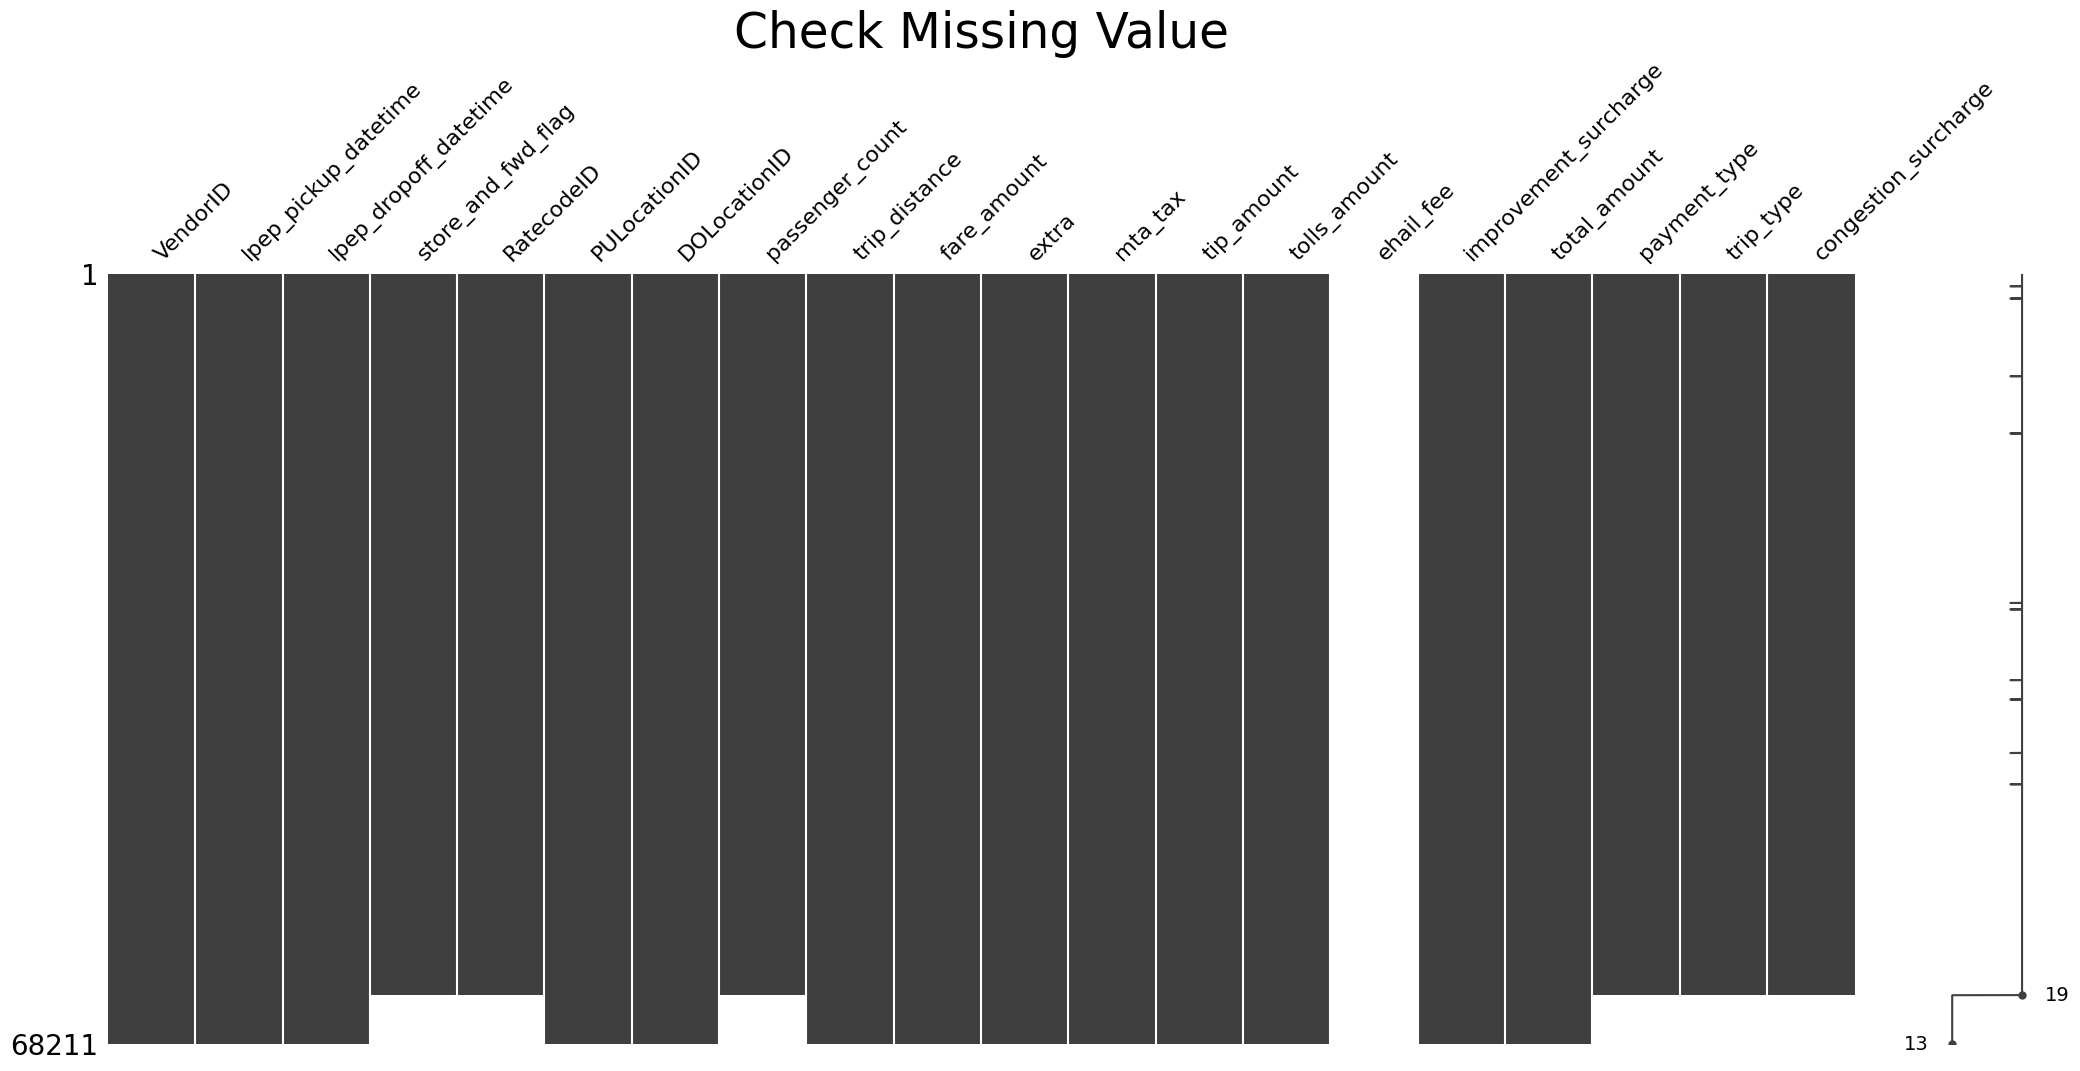

In [7]:
# 2. Cek Posisi Missing Value
ms.matrix(nyc)
plt.title('Check Missing Value', fontsize= 35)
plt.show()

Posisi missing value pada kolom yang mengandung missing value cenderung sama, maka baris yang mengandung nilai missing value akan kami hapus. Sebelumnya akan kami hapus terlebih dahulu kolom ehail_fee yang tidak memuat data apapun.

In [8]:
# 3. Menghapus kolom `ehail_fee`, karena tidak terdapat informasi apapun
nyc = nyc.drop('ehail_fee', axis=1)

In [9]:
# Menghapus baris yang mengandung missing value
nyc.dropna(inplace=True)

In [10]:
# 4. Chek data anomali pada kolom `RatecodeID`

nyc['RatecodeID'].unique()

array([1., 5., 4., 3., 2.])

Data yang bernilai `99` sudah tidak muncul setelah dilakukan cleaning pada missing value

In [11]:
# 5. Mengecek data minus pada kolom `fare_amount`, `extra`, `mta_tax`, `tip_amount`, `improvement_surcharge`, `total_amount`

nyc[(nyc['fare_amount'] < 0) | (nyc['extra'] < 0) | (nyc['mta_tax'] < 0) | (nyc['tip_amount'] < 0) | (nyc['improvement_surcharge'] < 0) | (nyc['total_amount'] < 0)]

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
662,2,2023-01-01 14:58:13,2023-01-01 14:58:39,N,1.0,75,74,2.0,0.17,-3.0,0.0,-0.5,0.0,0.0,-1.0,-4.5,3.0,1.0,0.0
898,2,2023-01-01 17:24:52,2023-01-01 17:25:12,N,1.0,193,193,1.0,0.00,-3.0,0.0,-0.5,0.0,0.0,-1.0,-4.5,4.0,1.0,0.0
1317,2,2023-01-02 02:05:08,2023-01-02 02:12:57,N,1.0,129,82,1.0,0.64,-8.6,-1.0,-0.5,0.0,0.0,-1.0,-11.1,3.0,1.0,0.0
1686,2,2023-01-02 12:56:53,2023-01-02 13:00:10,N,1.0,75,75,1.0,0.77,-4.5,0.0,-0.5,0.0,0.0,-0.3,-5.3,4.0,1.0,0.0
1864,2,2023-01-02 13:51:33,2023-01-02 13:52:42,N,1.0,75,75,2.0,0.08,-3.7,0.0,-0.5,0.0,0.0,-1.0,-5.2,3.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63358,2,2023-01-31 18:39:16,2023-01-31 18:39:29,N,1.0,130,130,3.0,0.05,-3.0,-2.5,-0.5,0.0,0.0,-1.0,-7.0,4.0,1.0,0.0
63544,2,2023-01-31 19:06:18,2023-01-31 19:06:46,N,1.0,75,75,2.0,0.08,-3.0,-2.5,-0.5,0.0,0.0,-1.0,-7.0,3.0,1.0,0.0
63655,2,2023-01-31 20:29:00,2023-01-31 20:29:14,N,1.0,74,74,1.0,0.00,-2.5,-0.5,-0.5,0.0,0.0,-0.3,-3.8,3.0,1.0,0.0
63807,2,2023-01-31 22:44:16,2023-01-31 22:45:18,N,1.0,256,256,1.0,0.15,-3.7,-1.0,-0.5,0.0,0.0,-1.0,-6.2,3.0,1.0,0.0


Terdapat 174 baris kolom pembayaran yang minus. Jika diperhatikan dari beberapa baris data, didapatkan bahwa

`Total_amount` = `fare_amount` + `extra` + `mta_tax` + `tip_amount` + `tolls_amount` + `improvement_surcharge`

maka nilai minus akan kami absolutkan, karena atribut diatas merupakan biaya yang dikeluarkan oleh penumpang.

In [12]:
# Absolutekan kolom `fare_amount`, `extra`, `mta_tax`, `tip_amount`, `improvement_surcharge`, `total_amount`

nyc.iloc[:, 9:16] = (nyc.iloc[:, 9:16]).abs()

In [13]:
# 6. Mengecek data minus pada kolom `congestion_surcharge`

nyc[(nyc['congestion_surcharge'] < 0) | (nyc['congestion_surcharge'] == 2.5)]

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
2497,2,2023-01-02 19:16:36,2023-01-02 19:30:21,N,1.0,114,162,1.0,2.49,15.6,0.0,0.5,3.92,0.00,1.0,23.52,1.0,1.0,2.50
2498,2,2023-01-02 19:49:45,2023-01-02 19:57:56,N,1.0,236,41,1.0,2.26,12.1,0.0,0.5,2.00,0.00,1.0,18.10,1.0,1.0,2.50
2691,2,2023-01-02 22:15:33,2023-01-02 22:25:11,N,1.0,236,238,1.0,1.71,12.1,1.0,0.5,3.42,0.00,1.0,20.52,1.0,1.0,2.50
2902,2,2023-01-03 07:49:18,2023-01-03 08:10:44,N,1.0,74,140,1.0,3.54,21.2,0.0,0.5,5.04,0.00,1.0,30.24,1.0,1.0,2.50
3016,2,2023-01-03 08:43:00,2023-01-03 08:59:42,N,1.0,74,236,1.0,1.97,16.3,0.0,0.5,4.06,0.00,1.0,24.36,1.0,1.0,2.50
8698,2,2023-01-05 18:55:20,2023-01-05 19:08:33,N,1.0,244,151,1.0,4.73,21.9,2.5,0.5,4.83,0.00,1.0,33.23,1.0,1.0,2.50
9633,2,2023-01-06 09:32:58,2023-01-06 09:57:17,N,1.0,43,246,1.0,4.79,25.4,0.0,0.5,3.00,0.00,1.0,32.40,1.0,1.0,2.50
9995,2,2023-01-06 12:38:54,2023-01-06 13:06:32,N,1.0,56,162,2.0,7.30,35.9,0.0,0.5,7.98,0.00,1.0,47.88,1.0,1.0,2.50
14200,2,2023-01-08 12:29:11,2023-01-08 12:41:26,N,1.0,74,262,1.0,2.61,14.9,0.0,0.5,0.00,0.00,1.0,18.90,1.0,1.0,2.50
15352,2,2023-01-09 06:53:22,2023-01-09 07:01:01,N,1.0,75,236,1.0,1.60,10.0,0.0,0.5,3.50,0.00,1.0,17.50,1.0,1.0,2.50


Biaya tambahan untuk taksi hijau sebeesar $2.75, dapat dibaca di [sini](https://www.nyc.gov/site/tlc/about/congestion-surcharge.page)

In [14]:
# Mengganti nilai pada kolom "congestion_surcharge"

nyc['congestion_surcharge'].replace([2.5, -2.75], 2.75, inplace=True)

/var/folders/hb/wb_5nh4x78s15v799c8_lglh0000gn/T/ipykernel_7939/3891571009.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  nyc['congestion_surcharge'].replace([2.5, -2.75], 2.75, inplace=True)


In [15]:
# 7. Merubah tipe data pada kolom `lpep_pickup_datetime` dan `lpep_dropoff_datetime` menjadi datetime

nyc = nyc.astype({'lpep_pickup_datetime': 'datetime64[s]','lpep_dropoff_datetime': 'datetime64[s]'})

In [16]:
# 8. Cek kolom `lpep_pickup_datetime` dan `lpep_dropoff_datetime` dengan data diurutkan

nyc[['lpep_pickup_datetime', 'lpep_dropoff_datetime']].sort_values(by='lpep_pickup_datetime', ascending=True)

,lpep_pickup_datetime,lpep_dropoff_datetime
17874,2009-01-01 20:21:27,2009-01-02 11:07:31
298,2022-12-09 14:10:49,2022-12-09 14:22:26
318,2022-12-09 14:55:42,2022-12-09 15:33:06
24,2023-01-01 00:01:31,2023-01-01 00:16:02
44,2023-01-01 00:04:25,2023-01-01 00:17:50
...,...,...
63844,2023-01-31 23:45:10,2023-01-31 23:54:53
63876,2023-01-31 23:53:41,2023-02-01 00:31:14
63858,2023-01-31 23:56:16,2023-02-01 00:03:16
63872,2023-01-31 23:58:23,2023-02-01 00:07:16


In [17]:
# Menghapus data anomali
nyc = nyc.drop(labels=[25100], axis=0)

In [19]:
nyc[['lpep_pickup_datetime', 'lpep_dropoff_datetime']].sort_values(by='lpep_dropoff_datetime', ascending=True)

,lpep_pickup_datetime,lpep_dropoff_datetime
17874,2009-01-01 20:21:27,2009-01-02 11:07:31
298,2022-12-09 14:10:49,2022-12-09 14:22:26
318,2022-12-09 14:55:42,2022-12-09 15:33:06
41,2023-01-01 00:08:05,2023-01-01 00:13:26
24,2023-01-01 00:01:31,2023-01-01 00:16:02
...,...,...
62120,2023-01-31 09:02:52,2023-02-01 09:01:47
62653,2023-01-31 13:57:30,2023-02-01 10:49:04
62591,2023-01-31 13:58:22,2023-02-01 11:46:10
62510,2023-01-31 12:41:35,2023-02-01 12:05:19


Terdapat tahun 2009 dan 2022, data ini akan kami hapus agar sesuai dengan batasan data yang akan kami analisis.

In [20]:
# Menghapus data anomali
nyc = nyc.drop(labels=[17874,298,318], axis=0)

In [21]:
# 9. Membuat kolom baru `trip_duration` = `lpep_dropoff_datetime` - `lpep_pickup_datetime`

trip_duration = nyc['lpep_dropoff_datetime'] - nyc['lpep_pickup_datetime']
nyc.insert(3, 'trip_duration', (trip_duration/np.timedelta64(1, 'm')).astype('float').round(2))


In [22]:
# 10. Membuat kolom baru `total_amount_1` = `lpep_dropoff_datetime` - `lpep_pickup_datetime`

nyc['total_amount_1'] = nyc['total_amount'] + nyc['congestion_surcharge']

In [23]:
# 11. Cek Deskriptif data

nyc.describe()

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,trip_duration,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,total_amount_1
count,63873.000000,63873,63873,63873.000000,63873.000000,63873.000000,63873.000000,63873.000000,63873.000000,63873.000000,63873.000000,63873.000000,63873.000000,63873.000000,63873.000000,63873.000000,63873.000000,63873.000000,63873.000000,63873.000000
mean,1.855886,2023-01-16 22:26:28,2023-01-16 22:44:25,17.959582,1.101780,97.729839,138.308127,1.315924,2.576773,16.107108,0.885210,0.629550,2.041908,0.144089,0.954489,21.246763,1.373663,1.021918,0.727185,21.973948
min,1.000000,2023-01-01 00:01:31,2023-01-01 00:13:26,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,2.000000,2023-01-09 12:16:23,2023-01-09 12:34:19,7.080000,1.000000,74.000000,74.000000,1.000000,1.100000,9.300000,0.000000,0.500000,0.000000,0.000000,1.000000,12.600000,1.000000,1.000000,0.000000,12.800000
50%,2.000000,2023-01-17 08:44:47,2023-01-17 08:59:30,11.100000,1.000000,75.000000,138.000000,1.000000,1.800000,12.800000,0.000000,0.500000,1.400000,0.000000,1.000000,17.500000,1.000000,1.000000,0.000000,18.100000
75%,2.000000,2023-01-24 16:18:41,2023-01-24 16:36:36,16.880000,1.000000,117.000000,220.000000,1.000000,3.050000,19.100000,1.000000,0.500000,3.220000,0.000000,1.000000,25.500000,2.000000,1.000000,2.750000,26.900000
max,2.000000,2023-01-31 23:58:23,2023-02-01 17:27:05,1439.880000,5.000000,265.000000,265.000000,9.000000,1571.970000,490.000000,12.500000,2.750000,222.220000,36.050000,1.000000,491.000000,5.000000,2.000000,2.750000,491.000000
std,0.351208,NaN,NaN,77.227807,0.620315,60.170717,76.884767,0.979147,6.760419,13.236881,1.289682,0.362471,2.998380,1.012454,0.175101,15.065956,0.508057,0.146419,1.212841,15.423872


Pada deskriptif data terlihat bahwa selisih nilai max dengan nilai 75% data pada kolom `trip_duration` dan kolom pembayaran cukup jauh. Selanjutnya akan kami cek dengan boxplot untuk melihat data outlier.

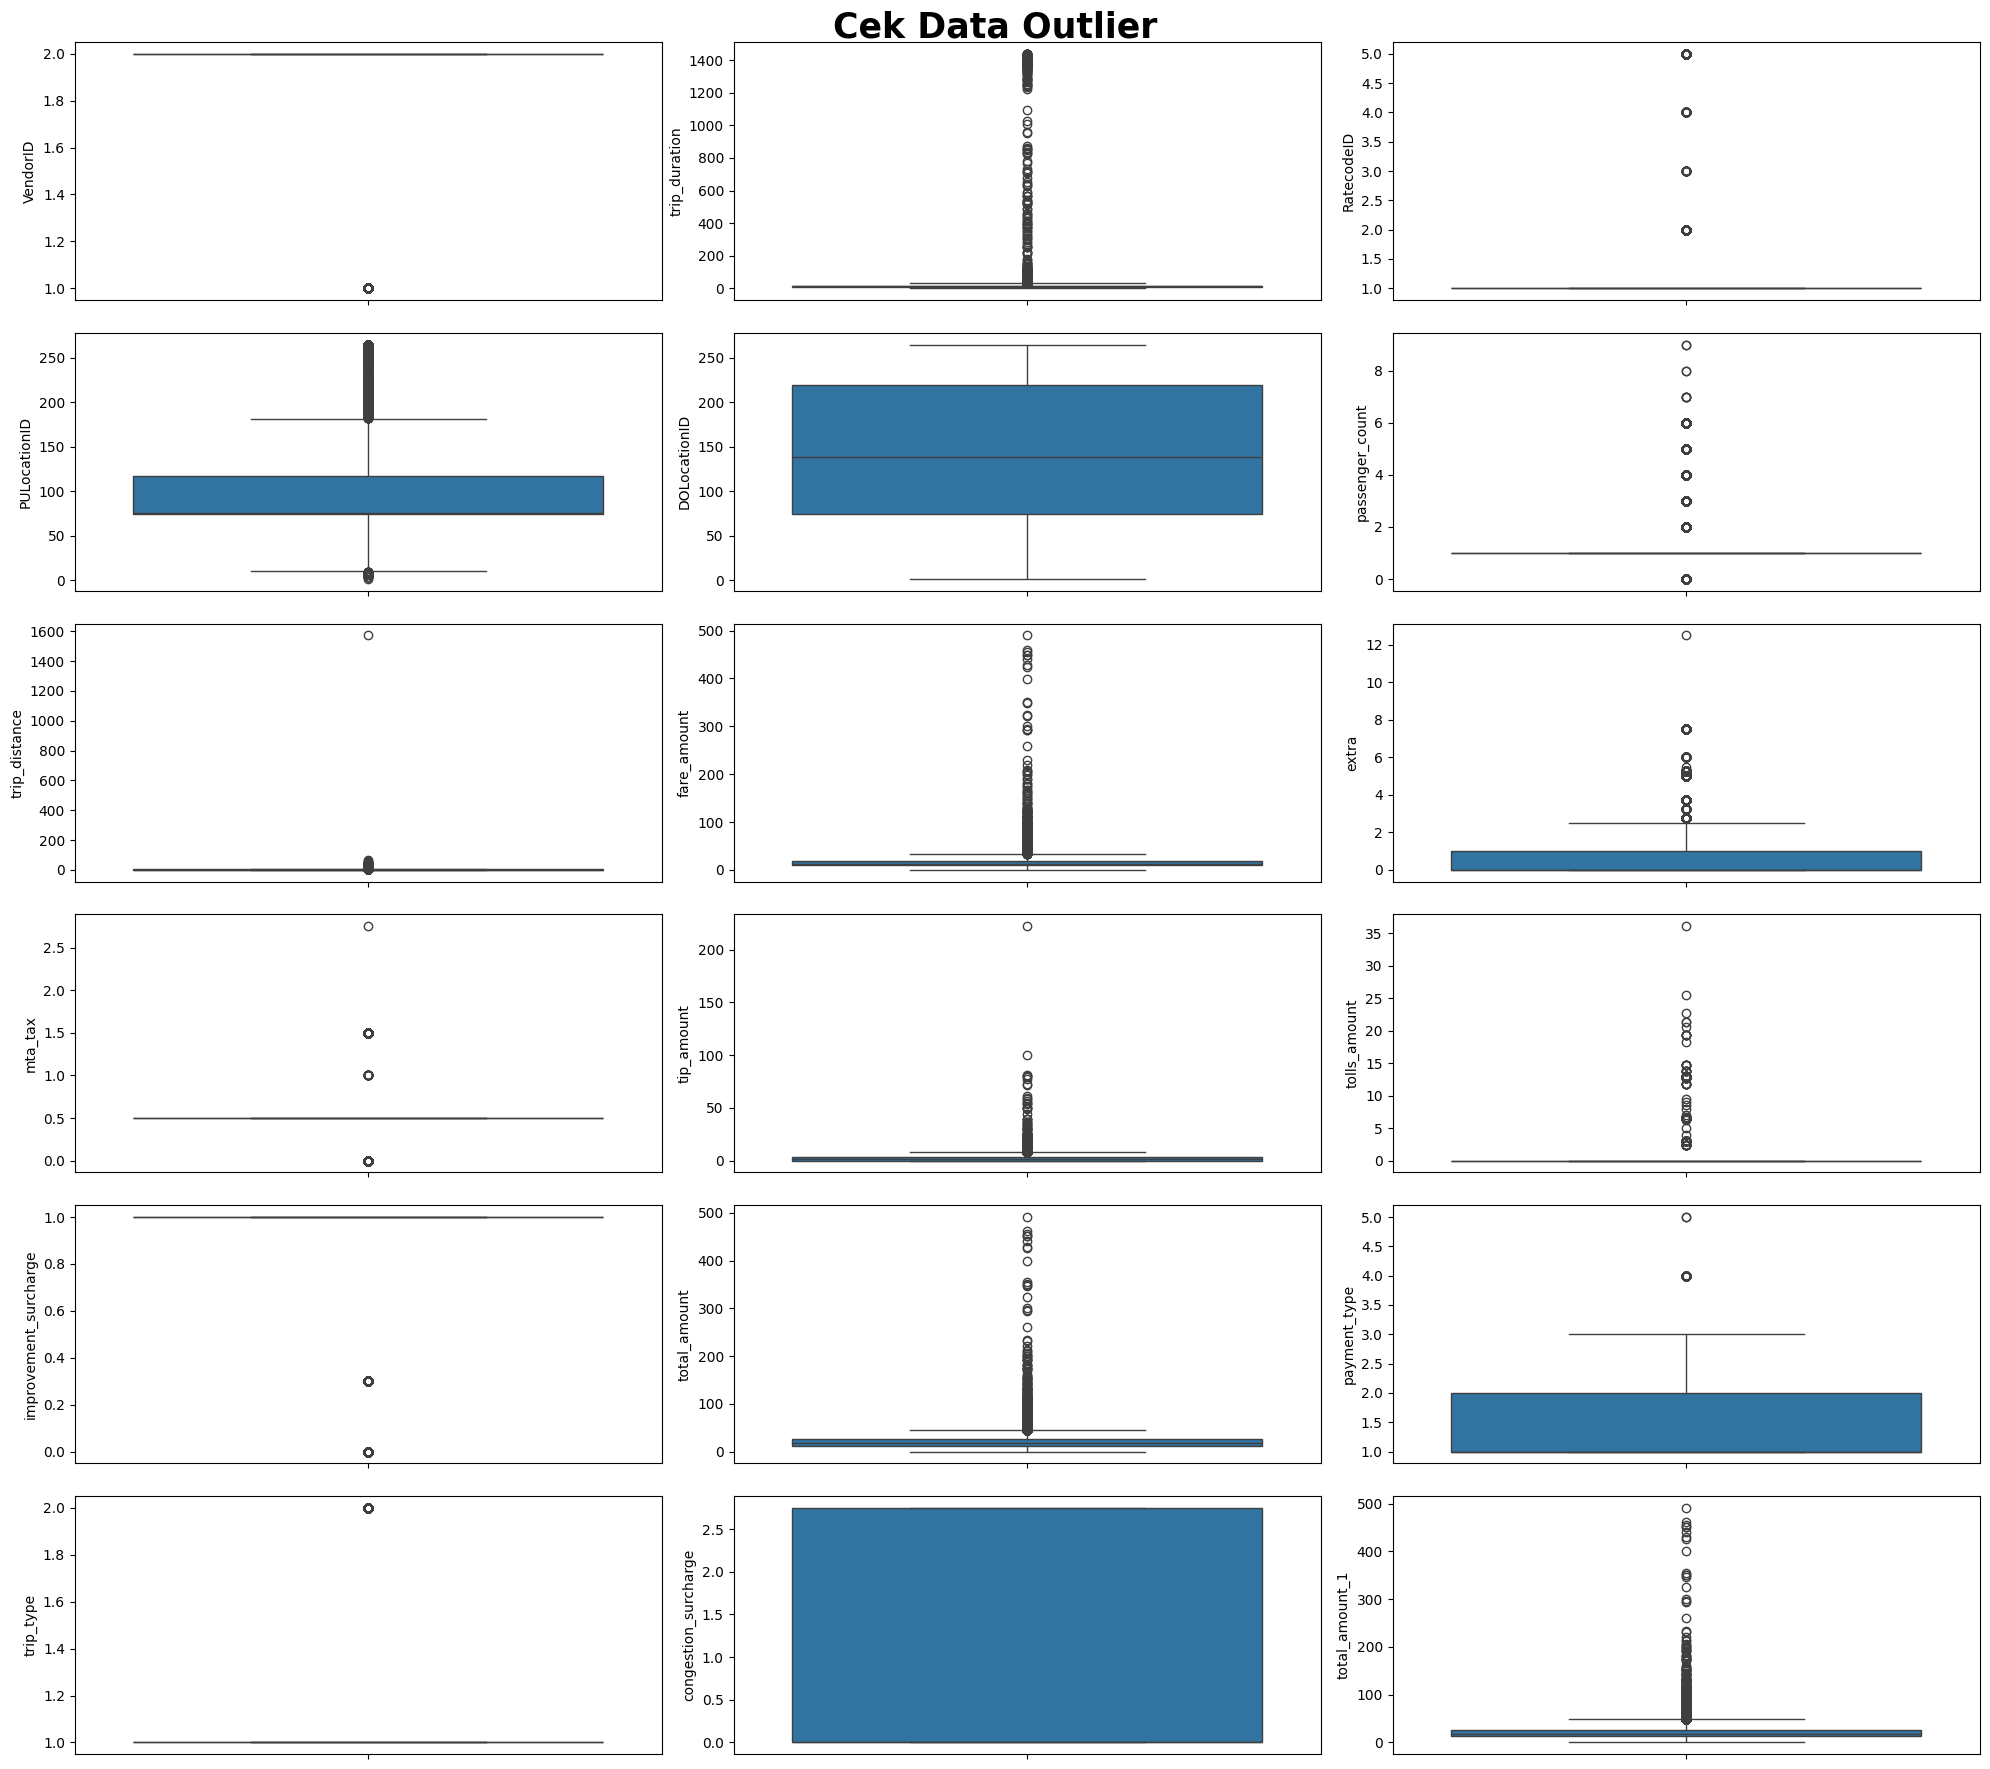

In [24]:
# 12. Cek data outlier menggunakan boxplot

fig, axs = plt.subplots(ncols=3, nrows=6, figsize=(20,18))
fig.suptitle('Cek Data Outlier', fontsize=25, fontweight='bold')
index = 0
axs = axs.flatten()
for k, v in nyc.select_dtypes(include=[np.number]).items():
    sns.boxplot(y=k, data=nyc, ax=axs[index])
    index += 1
plt.tight_layout(w_pad=0.5, h_pad=2)
plt.show()

- Hampir setiap atribut boxplot diatas menunjukkan tidak ada kolom yang berdistribusi normal, semuanya cenderung skewness kanan.
- Terdapat banyak sekali outlier, data outlier ini akan tetap kami masukkan kedalam analisis.

In [25]:
# 13 Cek korelasi antar kolom numerik

korelasi = nyc[['VendorID','trip_duration','RatecodeID','PULocationID','DOLocationID','passenger_count','trip_distance',
'fare_amount','extra','mta_tax','tip_amount','tolls_amount','improvement_surcharge','total_amount','payment_type',
'trip_type','congestion_surcharge']].corr()

korelasi

,VendorID,trip_duration,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
VendorID,1.000000,0.013646,0.041817,-0.017449,-0.000730,0.084185,0.020649,-0.006958,-0.122868,-0.964109,0.052383,-0.030546,-0.075517,0.007728,0.006719,0.042856,0.009409
trip_duration,0.013646,1.000000,0.006311,0.011638,0.017671,-0.008971,0.042479,0.109774,-0.008294,-0.015895,0.020458,0.036727,-0.012481,0.104599,-0.003128,-0.000574,0.030369
RatecodeID,0.041817,0.006311,1.000000,0.069278,0.033542,-0.000975,0.043359,0.203103,-0.091300,-0.262141,0.030511,0.052375,-0.094850,0.169563,-0.025544,0.936271,-0.070909
PULocationID,-0.017449,0.011638,0.069278,1.000000,0.095017,0.011257,0.036780,0.101276,0.018912,-0.000956,0.017966,0.031165,0.009262,0.090010,0.037889,0.066016,-0.080281
DOLocationID,-0.000730,0.017671,0.033542,0.095017,1.000000,0.001695,0.044055,0.089239,0.069591,-0.006684,0.120823,-0.000601,-0.018403,0.136552,-0.104824,0.029740,0.420123
passenger_count,0.084185,-0.008971,-0.000975,0.011257,0.001695,1.000000,0.007224,0.013327,-0.005147,-0.079897,0.025971,0.003649,0.035500,0.020085,-0.014199,-0.001779,0.023314
trip_distance,0.020649,0.042479,0.043359,0.036780,0.044055,0.007224,1.000000,0.296431,0.033018,-0.027515,0.133871,0.159038,0.001179,0.306384,-0.013628,-0.001162,0.085123
fare_amount,-0.006958,0.109774,0.203103,0.101276,0.089239,0.013327,0.296431,1.000000,0.017124,-0.031024,0.276311,0.314264,0.026687,0.966545,-0.044070,0.161470,0.148760
extra,-0.122868,-0.008294,-0.091300,0.018912,0.069591,-0.005147,0.033018,0.017124,1.000000,0.141212,0.127830,0.086957,0.061223,0.127344,-0.072502,-0.087744,0.089239
mta_tax,-0.964109,-0.015895,-0.262141,-0.000956,-0.006684,-0.079897,-0.027515,-0.031024,0.141212,1.000000,-0.054669,0.017047,0.129959,-0.037291,-0.003271,-0.257643,0.008119


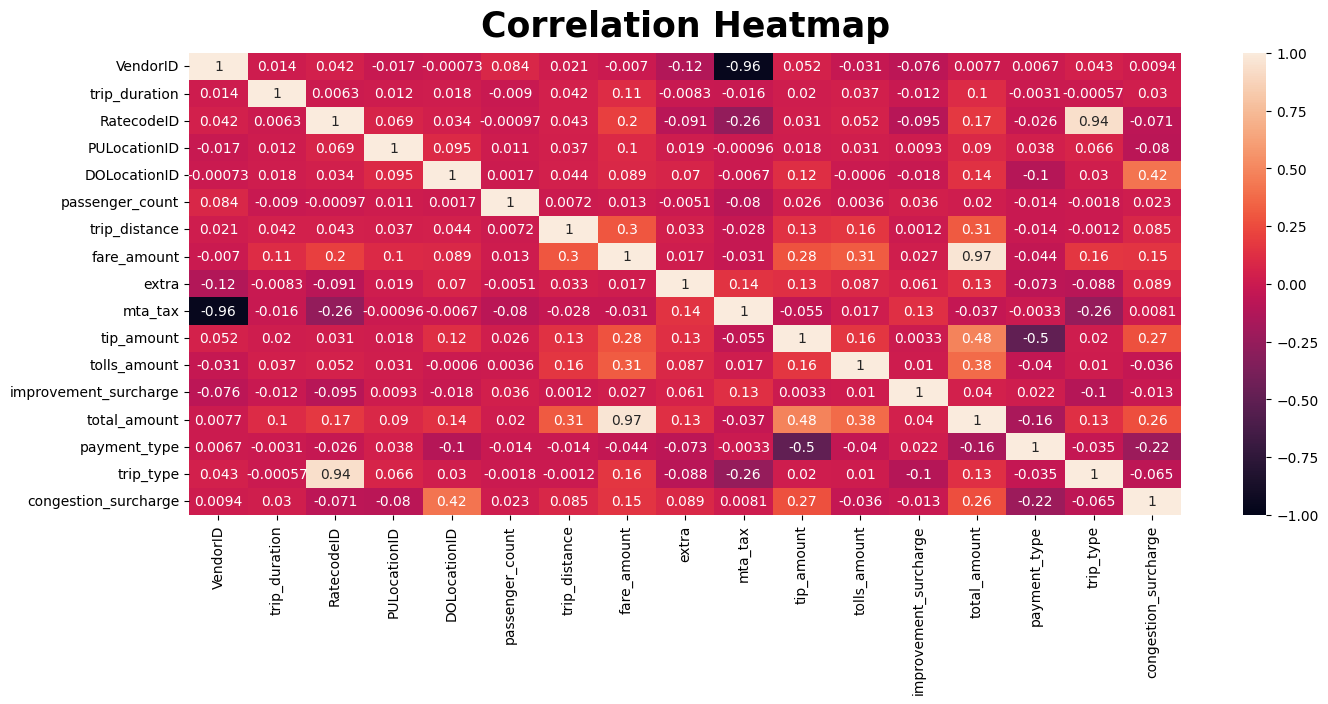

In [26]:
plt.figure(figsize=(16, 6))

heatmap = sns.heatmap(korelasi, vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':25, 'fontweight':'bold'}, pad=12)
plt.show()

Jika kita asumsikan atribut yang mempunyai korelasi bernilai diatas 0.4, maka atribut berikut yang mempunyai korelasi
- `total_amount` dengan `fare_amount` sebesar `0.97`
- `mta_tax` dengan `VendorID` sebesar `0.96`
- `trip_type` dengan `RatecodeID` sebesar `0.94`
- `payment_type` dengan `tip_amount` sebesar `0.5`
- `total_amount` dengan `tip_amount` sebesar `0.48`
- `congestion_surcharge` dengan `DOLocationID` sebesar `0.42`

## **Preparation 2**
1. Kolom `VendorID` akan kami konversi ke data string sesuai keterangan, yaitu nilai (1) Creative Mobile Technologies, LLC, (2) VeriFone Inc.
2. Kolom `RatecodeID` akan kami konversi ke data string sesuai keterangan, yaitu (1) Standard rate, (2) JFK, (3) Newark, (4) Nassau or Westchester, (5) Negotiated fare, (6) Group ride.
3. Kolom `payment_type` akan kami konversi ke data string sesuai keterangan, yaitu (1) Credit card, (2) Cash, (3) No charge, (4) Dispute, (5) Unknown, (6) Voided trip.
4. Kolom `trip_type` akan kami konversi ke data string sesuai keterangan, yaitu (1) Street-hail, (2) Dispatch
5. Buat pivot tabel berdasarkan atribut yang mempunyai korelasi

In [27]:
# 1. Mengganti nilai dataframe pada kolom `VendorID`
nyc['VendorID'].replace([1, 2],['Creative Mobile Technologies, LLC', 'VeriFone Inc'], inplace=True)

/var/folders/hb/wb_5nh4x78s15v799c8_lglh0000gn/T/ipykernel_7939/1325356185.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  nyc['VendorID'].replace([1, 2],['Creative Mobile Technologies, LLC', 'VeriFone Inc'], inplace=True)


In [28]:
# 2. Mengganti nilai dataframe pada kolom `RatecodeID`
nyc['RatecodeID'].replace([1, 2, 3, 4, 5, 6],['Standard rate', 'JFK', 'Newark', 'Nassau or Westchester', 'Negotiated fare', 'Group ride'], inplace=True)

/var/folders/hb/wb_5nh4x78s15v799c8_lglh0000gn/T/ipykernel_7939/1709772919.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  nyc['RatecodeID'].replace([1, 2, 3, 4, 5, 6],['Standard rate', 'JFK', 'Newark', 'Nassau or Westchester', 'Negotiated fare', 'Group ride'], inplace=True)


In [29]:
# 3. Mengganti nilai dataframe pada kolom `payment_type`
nyc['payment_type'].replace([1, 2, 3, 4, 5, 6],['Credit card', 'Cash', 'No charge', 'Dispute', 'Unknown', 'Voided trip'], inplace=True)

/var/folders/hb/wb_5nh4x78s15v799c8_lglh0000gn/T/ipykernel_7939/1641813819.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  nyc['payment_type'].replace([1, 2, 3, 4, 5, 6],['Credit card', 'Cash', 'No charge', 'Dispute', 'Unknown', 'Voided trip'], inplace=True)


In [30]:
# 4. Mengganti nilai dataframe pada kolom `trip_type`
nyc['trip_type'].replace([1, 2],['Street-hail', 'Dispatch'], inplace=True)

/var/folders/hb/wb_5nh4x78s15v799c8_lglh0000gn/T/ipykernel_7939/1483209257.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  nyc['trip_type'].replace([1, 2],['Street-hail', 'Dispatch'], inplace=True)


In [31]:
# 5. Melihat atribut yang mempunyai korelasi menggunakan tabel pivot, dengan data yang sudah dikonversi menjadi data kategorik
# a. `mta_tax` dengan `VendorID` sebesar `0.96`
# b `trip_type` dengan `RatecodeID` sebesar `0.94`
# c `payment_type` dengan `tip_amount` sebesar `0.5`
# d `congestion_surcharge` dengan `DOLocationID` sebesar `0.42`

In [32]:
# 5a
pd.pivot_table(nyc, values='lpep_pickup_datetime', index=['VendorID', 'mta_tax'], aggfunc="count")

lpep_pickup_datetime
VendorID                          mta_tax                      
Creative Mobile Technologies, LLC 0.00                       76
                                  0.50                       48
                                  1.00                       25
                                  1.50                     9055
                                  2.75                        1
VeriFone Inc                      0.00                     1514
                                  0.50                    53154

Dapat disimpulkan bahwa provider Verifone Inc dalam menentukan tarif pajak cenderung stabil, yakni selalu di angka **$0.5**, sedangkan provider Creative Mobile Technologies, LLC dalam menentukan tarif pajak lebih variatif.

In [33]:
# 5b
pd.pivot_table(nyc, values='lpep_pickup_datetime', index=['trip_type', 'RatecodeID'], aggfunc="count")

lpep_pickup_datetime
trip_type   RatecodeID                                 
Dispatch    Nassau or Westchester                     2
            Negotiated fare                        1392
            Standard rate                             6
Street-hail JFK                                     158
            Nassau or Westchester                    55
            Negotiated fare                         136
            Newark                                   30
            Standard rate                         62094

Dapat dilihat bahwa orang-orang yang memesan taksi dengan cara **Street-hail** atau dipanggil dijalan biasanya menggunakan tarif **Standard rate**. Hal ini masuk akal memngingat rata-rata jarak perjalanan hanya 2.57mil. Sedangkan orang-orang yang memesan taksi dengan aplikasi atau **Dispatch** biasanya menggunakan **Negotiated fare**.

In [34]:
# 5c
pd.pivot_table(nyc, values='lpep_pickup_datetime', index=['payment_type', 'tip_amount'], aggfunc="count")

lpep_pickup_datetime
payment_type tip_amount                      
Cash         0.00                       22629
             5.00                           1
Credit card  0.00                        5135
             0.01                         180
             0.02                          44
...                                       ...
No charge    0.00                         456
             0.01                           4
             0.13                           2
             0.90                          10
Unknown      0.00                           2

[1327 rows x 1 columns]

In [35]:
# Cek tip_amount dari jumlah keseluruhan berdasarkan payment_type
pd.pivot_table(nyc, values='tip_amount', index=['payment_type'], aggfunc="sum").sort_values(by=['tip_amount'],ascending=False)

,tip_amount
payment_type,
Credit card,130387.5
Dispute,21.0
No charge,9.3
Cash,5.0
Unknown,0.0


In [36]:
# Cek tip_amount dari banyaknya transaksi berdasarkan payment_type
pd.pivot_table(nyc, values='tip_amount', index=['payment_type'], aggfunc="count").sort_values(by=['tip_amount'],ascending=False)

,tip_amount
payment_type,
Credit card,40674
Cash,22630
No charge,472
Dispute,95
Unknown,2


Dataframe diatas menunjukkan tip yang diperoleh paling banyak menggunakan  payment_type `Credit card`, hal ini bisa dijadikan program promosi bagi pengguna Credit card agar kesejahteraan sopir taksi menjadi lebih baik.

In [37]:
# 5d
zona_macet = pd.pivot_table(nyc, values='lpep_pickup_datetime', index=['congestion_surcharge', 'DOLocationID'], aggfunc="count")
zona_macet

lpep_pickup_datetime
congestion_surcharge DOLocationID                      
0.00                 1                               19
                     3                               11
                     4                                2
                     7                             1103
                     8                                3
...                                                 ...
2.75                 261                             34
                     262                            849
                     263                           1410
                     264                              9
                     265                              1

[369 rows x 1 columns]

In [38]:
zona_macet.loc[2.75].reset_index().sort_values(by=['lpep_pickup_datetime'], ascending=False).head(10)

,DOLocationID,lpep_pickup_datetime
112,236,2493
114,238,1417
127,263,1410
115,239,1398
113,237,981
126,262,849
65,142,744
64,141,706
63,140,702
21,43,546


Data diatas adalah ID zona drop off yang sering macet, sehingga penumpang diharuskan membayar pajak sebesar $2.75.

In [39]:
# Cek ulang data nyc
checkData(nyc)

,feature,data_type,total_row,total_null,%null_value,n_unique,sample_unique
0,VendorID,object,63873,0,0.0,2,"[VeriFone Inc, Creative Mobile Technologies, LLC]"
1,lpep_pickup_datetime,datetime64[s],63873,0,0.0,62661,"[2023-01-01 00:26:10, 2023-01-01 00:51:03, 202..."
2,lpep_dropoff_datetime,datetime64[s],63873,0,0.0,62598,"[2023-01-01 00:37:11, 2023-01-01 00:57:49, 202..."
3,trip_duration,float64,63873,0,0.0,3627,"[11.02, 6.77, 6.33, 5.82, 5.97, 17.55, 17.42, ..."
4,store_and_fwd_flag,object,63873,0,0.0,2,"[N, Y]"
5,RatecodeID,object,63873,0,0.0,5,"[Standard rate, Negotiated fare, Nassau or Wes..."
6,PULocationID,int64,63873,0,0.0,222,"[166, 24, 223, 41, 181, 255, 75, 66, 195, 83, ..."
7,DOLocationID,int64,63873,0,0.0,248,"[143, 43, 179, 238, 74, 262, 45, 75, 166, 140,..."
8,passenger_count,float64,63873,0,0.0,10,"[1.0, 2.0, 4.0, 3.0, 6.0, 5.0, 0.0, 7.0, 9.0, ..."
9,trip_distance,float64,63873,0,0.0,1727,"[2.58, 1.81, 0.0, 1.3, 1.1, 2.78, 3.8, 1.88, 1..."


In [40]:
nyc

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,trip_duration,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,...,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,total_amount_1
0,VeriFone Inc,2023-01-01 00:26:10,2023-01-01 00:37:11,11.02,N,Standard rate,166,143,1.0,2.58,...,1.0,0.5,4.03,0.0,1.0,24.18,Credit card,Street-hail,2.75,26.93
1,VeriFone Inc,2023-01-01 00:51:03,2023-01-01 00:57:49,6.77,N,Standard rate,24,43,1.0,1.81,...,1.0,0.5,2.64,0.0,1.0,15.84,Credit card,Street-hail,0.00,15.84
2,VeriFone Inc,2023-01-01 00:35:12,2023-01-01 00:41:32,6.33,N,Standard rate,223,179,1.0,0.00,...,1.0,0.5,1.94,0.0,1.0,11.64,Credit card,Street-hail,0.00,11.64
3,"Creative Mobile Technologies, LLC",2023-01-01 00:13:14,2023-01-01 00:19:03,5.82,N,Standard rate,41,238,1.0,1.30,...,0.5,1.5,1.70,0.0,1.0,10.20,Credit card,Street-hail,0.00,10.20
4,"Creative Mobile Technologies, LLC",2023-01-01 00:33:04,2023-01-01 00:39:02,5.97,N,Standard rate,41,74,1.0,1.10,...,0.5,1.5,0.00,0.0,1.0,8.00,Credit card,Street-hail,0.00,8.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63882,VeriFone Inc,2023-01-31 23:09:22,2023-01-31 23:17:21,7.98,N,Negotiated fare,130,205,1.0,2.75,...,0.0,0.0,2.00,0.0,0.3,17.30,Credit card,Dispatch,0.00,17.30
63883,VeriFone Inc,2023-01-31 23:06:18,2023-01-31 23:17:03,10.75,N,Standard rate,65,181,1.0,2.44,...,1.0,0.5,3.20,0.0,1.0,19.20,Credit card,Street-hail,0.00,19.20
63884,VeriFone Inc,2023-01-31 23:17:03,2023-01-31 23:23:04,6.02,N,Standard rate,244,116,1.0,1.40,...,1.0,0.5,2.36,0.0,1.0,14.16,Credit card,Street-hail,0.00,14.16
63885,VeriFone Inc,2023-01-31 23:29:18,2023-01-31 23:38:50,9.53,N,Standard rate,74,238,1.0,2.47,...,1.0,0.5,3.75,0.0,1.0,22.50,Credit card,Street-hail,2.75,25.25


Pengecekan ulang, terlihat bahwa missing value sudah tidak ada, data anomali juga sudah tidak ada. Kemudian kolom yang membutuhkan kejelasan maksud data sesuai keterangan juga sudah kami konversikan.

## **Preparation 3**
1. Import data nama wilayah
2. Cek Kesesuaian data nyc dengan data zona, apakah terdapat missing value atau data anomali.
3. Gabung data nama wilayah dengan data transaksi taksi hijau (dataframe `nyc`)
4. Cek ulang data pada tiap kolom, cleaning jika diperlukan.
5. Eksport data kedalam bentuk csv

In [41]:
# 1. Import data csv  nama wilayah
zona = pd.read_csv("/Users/user/JCDS0212/MODUL2/Capstone Modul 2/taxi+_zone_lookup.csv")

In [42]:
zona

,LocationID,Borough,Zone,service_zone
0,1,EWR,Newark Airport,EWR
1,2,Queens,Jamaica Bay,Boro Zone
2,3,Bronx,Allerton/Pelham Gardens,Boro Zone
3,4,Manhattan,Alphabet City,Yellow Zone
4,5,Staten Island,Arden Heights,Boro Zone
...,...,...,...,...
260,261,Manhattan,World Trade Center,Yellow Zone
261,262,Manhattan,Yorkville East,Yellow Zone
262,263,Manhattan,Yorkville West,Yellow Zone
263,264,Unknown,NaN,NaN


In [43]:
# 2. Cek data zona
checkData(zona)

,feature,data_type,total_row,total_null,%null_value,n_unique,sample_unique
0,LocationID,int64,265,0,0.000000,265,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14..."
1,Borough,object,265,1,0.377358,7,"[EWR, Queens, Bronx, Manhattan, Staten Island,..."
2,Zone,object,265,1,0.377358,261,"[Newark Airport, Jamaica Bay, Allerton/Pelham ..."
3,service_zone,object,265,2,0.754717,4,"[EWR, Boro Zone, Yellow Zone, Airports, nan]"


Jika kita lihat pada data null atau missing value, pada kolom `Borough` dan `Zone` terdapat masing-masing 1 nilai, dan pada kolo `service_zone` terdapat 2 nilai.
Selanjutnya akan kami lihat ada berapa baris dengan kolom `PULocationID` atau kode lokasi penjemputan bernilai 264

In [44]:
nyc.loc[nyc['PULocationID'] == 264]

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,trip_duration,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,...,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,total_amount_1
115,VeriFone Inc,2023-01-01 01:52:58,2023-01-01 01:53:00,0.03,N,Standard rate,264,264,1.0,0.00,...,1.0,0.5,21.5,0.0,0.3,26.3,Credit card,Street-hail,0.0,26.3
245,VeriFone Inc,2023-01-01 03:16:39,2023-01-01 03:16:42,0.05,N,Negotiated fare,264,264,1.0,0.00,...,0.0,0.0,0.0,0.0,1.0,11.0,Cash,Dispatch,0.0,11.0
283,VeriFone Inc,2023-01-01 05:29:35,2023-01-01 05:29:37,0.03,N,Negotiated fare,264,264,1.0,0.00,...,0.0,0.0,2.6,0.0,1.0,15.6,Credit card,Dispatch,0.0,15.6
1331,VeriFone Inc,2023-01-02 04:41:06,2023-01-02 04:41:08,0.03,N,Standard rate,264,264,1.0,0.00,...,1.0,0.5,0.0,0.0,1.0,5.5,Cash,Street-hail,0.0,5.5
1345,"Creative Mobile Technologies, LLC",2023-01-02 06:40:44,2023-01-02 06:50:28,9.73,N,Standard rate,264,256,2.0,2.40,...,0.0,1.5,0.0,0.0,1.0,11.5,Cash,Street-hail,0.0,11.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61912,"Creative Mobile Technologies, LLC",2023-01-31 08:16:40,2023-01-31 08:45:26,28.77,N,Standard rate,264,264,1.0,0.00,...,0.0,1.5,0.0,0.0,1.0,21.0,Credit card,Street-hail,0.0,21.0
62261,VeriFone Inc,2023-01-31 11:00:15,2023-01-31 11:00:17,0.03,N,Negotiated fare,264,264,1.0,0.18,...,0.0,0.0,0.0,0.0,1.0,11.0,Credit card,Dispatch,0.0,11.0
63725,VeriFone Inc,2023-01-31 21:24:02,2023-01-31 21:24:03,0.02,N,Negotiated fare,264,264,1.0,0.00,...,0.0,0.0,0.0,0.0,1.0,36.0,Credit card,Dispatch,0.0,36.0
63868,VeriFone Inc,2023-01-31 23:44:44,2023-01-31 23:45:15,0.52,N,Negotiated fare,264,264,1.0,0.00,...,0.0,0.0,0.0,0.0,1.0,11.0,Dispute,Dispatch,0.0,11.0


Sekilas dari 135 baris data menunjukkan orang yang berada pada titik penjemputan `264` atau `Unknown` juga akan berhenti pada titik tersebut, namun yang menjadi ganjil trip distance beberapa data terlihat `0 mil` dan total amount tetap terisi.

Kami akan melihat berapa banyak baris data yang titk penjemputan dan pemberhentian pada zona `264`.

In [45]:
nyc.loc[(nyc['PULocationID'] == 264) & (nyc['DOLocationID'] == 264) & (nyc['trip_distance'] == 0) & (nyc['total_amount'] == 0)]

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,trip_duration,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,...,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,total_amount_1
1581,VeriFone Inc,2023-01-02 10:29:51,2023-01-02 10:30:34,0.72,N,Standard rate,264,264,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,Credit card,Street-hail,0.0,0.0
3557,VeriFone Inc,2023-01-03 12:39:11,2023-01-03 12:39:19,0.13,N,Standard rate,264,264,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,Credit card,Street-hail,0.0,0.0
54648,VeriFone Inc,2023-01-27 12:21:17,2023-01-27 12:21:30,0.22,N,Standard rate,264,264,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,Credit card,Street-hail,0.0,0.0


Data dengan titik penjemputan dan pemberhentian pada zona `264` serta tidak memilika jarak tempuh `trip_disatnce` dan total pembayaran `total_amount` akan kami hapus, ini dibuktikan juga dari waktu perjalanan `trip_duartion` yang kurang dari 1 menit, maka kami asumsikan penumpang tidak jadi menumpang atau kesalahan rekaman.

In [46]:
# Menghapus data Unknown
nyc = nyc.drop(labels=[1581,3557,54648], axis=0)

In [47]:
nyc.loc[(nyc['PULocationID'] == 264) & (nyc['DOLocationID'] == 264) & (nyc['trip_distance'] == 0)]

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,trip_duration,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,...,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,total_amount_1
115,VeriFone Inc,2023-01-01 01:52:58,2023-01-01 01:53:00,0.03,N,Standard rate,264,264,1.0,0.0,...,1.0,0.5,21.5,0.0,0.3,26.3,Credit card,Street-hail,0.0,26.3
245,VeriFone Inc,2023-01-01 03:16:39,2023-01-01 03:16:42,0.05,N,Negotiated fare,264,264,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,11.0,Cash,Dispatch,0.0,11.0
283,VeriFone Inc,2023-01-01 05:29:35,2023-01-01 05:29:37,0.03,N,Negotiated fare,264,264,1.0,0.0,...,0.0,0.0,2.6,0.0,1.0,15.6,Credit card,Dispatch,0.0,15.6
1331,VeriFone Inc,2023-01-02 04:41:06,2023-01-02 04:41:08,0.03,N,Standard rate,264,264,1.0,0.0,...,1.0,0.5,0.0,0.0,1.0,5.5,Cash,Street-hail,0.0,5.5
2088,VeriFone Inc,2023-01-02 15:02:08,2023-01-02 15:02:08,0.00,N,Standard rate,264,264,1.0,0.0,...,0.0,0.5,0.0,0.0,1.0,4.5,Cash,Street-hail,0.0,4.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60553,"Creative Mobile Technologies, LLC",2023-01-30 14:41:14,2023-01-30 15:25:55,44.68,N,Standard rate,264,264,1.0,0.0,...,0.0,1.5,0.0,0.0,1.0,39.0,Credit card,Street-hail,0.0,39.0
61912,"Creative Mobile Technologies, LLC",2023-01-31 08:16:40,2023-01-31 08:45:26,28.77,N,Standard rate,264,264,1.0,0.0,...,0.0,1.5,0.0,0.0,1.0,21.0,Credit card,Street-hail,0.0,21.0
63725,VeriFone Inc,2023-01-31 21:24:02,2023-01-31 21:24:03,0.02,N,Negotiated fare,264,264,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,36.0,Credit card,Dispatch,0.0,36.0
63868,VeriFone Inc,2023-01-31 23:44:44,2023-01-31 23:45:15,0.52,N,Negotiated fare,264,264,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,11.0,Dispute,Dispatch,0.0,11.0


Data dengan titik penjemputan dan pemberhentian pada zona `264` dapat kita asumsikan bahwa zona penjemputan dari `100 transaksi` tidak terekam. Data akan tetap kami pertahankan untuk analisis.

In [48]:
nyc.loc[((nyc['PULocationID'] == 264) | (nyc['DOLocationID'] == 264)) & (nyc['total_amount'] == 0) ]

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,trip_duration,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,...,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,total_amount_1
2793,"Creative Mobile Technologies, LLC",2023-01-03 03:50:19,2023-01-03 03:50:19,0.00,Y,Negotiated fare,129,264,3.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,Cash,Street-hail,0.0,0.0
5522,VeriFone Inc,2023-01-04 12:13:58,2023-01-04 12:13:59,0.02,N,Standard rate,193,264,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,Credit card,Street-hail,0.0,0.0
6550,VeriFone Inc,2023-01-04 18:06:19,2023-01-04 18:06:19,0.00,N,Standard rate,193,264,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,Cash,Street-hail,0.0,0.0
6911,VeriFone Inc,2023-01-04 21:17:51,2023-01-04 21:17:54,0.05,N,Standard rate,193,264,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,Cash,Street-hail,0.0,0.0


Data dengan `DOLocationID` bernilai `264` namun `PULocationID` pada zona yang lain, ditinjai dari `trip_duration` kurang dari 1 menit, tidak terdapat jarak perjalanan `trip_distance`, dan `total_amount` bernilai $0. Keempat data ini juga akan kami hapus.

In [49]:
# Menghapus data Unknown
nyc = nyc.drop(labels=[2793,5522,6550,6911], axis=0)

Perlakuan diatas akan kami lakukan juga pada data denga zona `265`

In [50]:
nyc.loc[((nyc['PULocationID'] == 265) | (nyc['DOLocationID'] == 265)) & (nyc['trip_distance'] == 0) & (nyc['total_amount'] == 0)]

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,trip_duration,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,...,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,total_amount_1


Tidak kami temukan pada zona ID `265` baik di titik penjemputan `PULocationID` maupun titik pemberhentian `DOLocationID` yang memiliki data aneh yakni `trip_distance` bernilai 0 mil yang artinya tidak ada jarak tempuh perjalanan dan `total_amount` bernilai $0 yang artinya tidak ada pembayaran. Maka data dengan zona `265` akan tetap kami pertahankan untuk analisis.

Dikarenakan pada sekilas data di zona `264` terdapat data yang aneh yakni `trip_distance` bernilai 0 mil yang artinya tidak ada jarak tempuh perjalanan dan `total_amount` bernilai $0 yang artinya tidak ada pembayaran. Kami cek keanehan data tersebut pada zona yang lain dengan memperhatikan waktu perjalanan `trip_duration`. Jika kurang dari 1 menit akan kami hapus.

In [51]:
nyc.loc[(nyc['total_amount'] == 0) & (nyc['trip_distance'] == 0) & (nyc['trip_duration'] < 1)]

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,trip_duration,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,...,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,total_amount_1
3674,VeriFone Inc,2023-01-03 13:28:25,2023-01-03 13:28:30,0.08,N,Standard rate,193,193,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,Credit card,Street-hail,0.0,0.0
3962,VeriFone Inc,2023-01-03 15:21:44,2023-01-03 15:22:17,0.55,N,Standard rate,193,193,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,Credit card,Street-hail,0.0,0.0
4604,VeriFone Inc,2023-01-03 20:23:42,2023-01-03 20:24:00,0.30,N,Standard rate,193,193,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,Credit card,Street-hail,0.0,0.0
5186,VeriFone Inc,2023-01-04 09:34:55,2023-01-04 09:35:30,0.58,N,Standard rate,193,193,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,Credit card,Street-hail,0.0,0.0
6829,VeriFone Inc,2023-01-04 20:52:14,2023-01-04 20:52:37,0.38,N,Standard rate,193,193,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,Credit card,Street-hail,0.0,0.0
13889,"Creative Mobile Technologies, LLC",2023-01-08 05:14:25,2023-01-08 05:14:50,0.42,N,Negotiated fare,129,129,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,No charge,Dispatch,0.0,0.0
16460,VeriFone Inc,2023-01-09 15:56:38,2023-01-09 15:56:48,0.17,N,Standard rate,193,193,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,Credit card,Street-hail,0.0,0.0
17678,VeriFone Inc,2023-01-10 08:44:19,2023-01-10 08:44:54,0.58,N,Standard rate,207,207,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,Cash,Street-hail,0.0,0.0
18396,VeriFone Inc,2023-01-10 14:09:51,2023-01-10 14:10:31,0.67,N,Standard rate,193,193,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,Cash,Street-hail,0.0,0.0
20041,VeriFone Inc,2023-01-11 10:59:26,2023-01-11 10:59:41,0.25,N,Newark,193,193,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,Cash,Street-hail,0.0,0.0


In [52]:
nyc.drop(nyc[(nyc['total_amount'] == 0) & (nyc['trip_distance'] == 0) & (nyc['trip_duration'] < 1)].index, inplace=True)

In [53]:
# 3. Merge dataframe nyc dengan dataframe zona

nyc = nyc.merge(zona.set_index("LocationID"), left_on="PULocationID", how="left", right_index=True)
nyc.rename(columns={"Borough": "PU_Borough",
                   "Zone": "PU_Zone",
                   "service_zone": "PU_Service_Zone"}, inplace=True)

nyc = nyc.merge(zona.set_index("LocationID"), left_on="DOLocationID", how="left", right_index=True)
nyc.rename(columns={"Borough": "DO_Borough",
                   "Zone": "DO_Zone",
                   "service_zone": "DO_Service_Zone"}, inplace=True)

In [54]:
nyc

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,trip_duration,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,...,payment_type,trip_type,congestion_surcharge,total_amount_1,PU_Borough,PU_Zone,PU_Service_Zone,DO_Borough,DO_Zone,DO_Service_Zone
0,VeriFone Inc,2023-01-01 00:26:10,2023-01-01 00:37:11,11.02,N,Standard rate,166,143,1.0,2.58,...,Credit card,Street-hail,2.75,26.93,Manhattan,Morningside Heights,Boro Zone,Manhattan,Lincoln Square West,Yellow Zone
1,VeriFone Inc,2023-01-01 00:51:03,2023-01-01 00:57:49,6.77,N,Standard rate,24,43,1.0,1.81,...,Credit card,Street-hail,0.00,15.84,Manhattan,Bloomingdale,Yellow Zone,Manhattan,Central Park,Yellow Zone
2,VeriFone Inc,2023-01-01 00:35:12,2023-01-01 00:41:32,6.33,N,Standard rate,223,179,1.0,0.00,...,Credit card,Street-hail,0.00,11.64,Queens,Steinway,Boro Zone,Queens,Old Astoria,Boro Zone
3,"Creative Mobile Technologies, LLC",2023-01-01 00:13:14,2023-01-01 00:19:03,5.82,N,Standard rate,41,238,1.0,1.30,...,Credit card,Street-hail,0.00,10.20,Manhattan,Central Harlem,Boro Zone,Manhattan,Upper West Side North,Yellow Zone
4,"Creative Mobile Technologies, LLC",2023-01-01 00:33:04,2023-01-01 00:39:02,5.97,N,Standard rate,41,74,1.0,1.10,...,Credit card,Street-hail,0.00,8.00,Manhattan,Central Harlem,Boro Zone,Manhattan,East Harlem North,Boro Zone
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63882,VeriFone Inc,2023-01-31 23:09:22,2023-01-31 23:17:21,7.98,N,Negotiated fare,130,205,1.0,2.75,...,Credit card,Dispatch,0.00,17.30,Queens,Jamaica,Boro Zone,Queens,Saint Albans,Boro Zone
63883,VeriFone Inc,2023-01-31 23:06:18,2023-01-31 23:17:03,10.75,N,Standard rate,65,181,1.0,2.44,...,Credit card,Street-hail,0.00,19.20,Brooklyn,Downtown Brooklyn/MetroTech,Boro Zone,Brooklyn,Park Slope,Boro Zone
63884,VeriFone Inc,2023-01-31 23:17:03,2023-01-31 23:23:04,6.02,N,Standard rate,244,116,1.0,1.40,...,Credit card,Street-hail,0.00,14.16,Manhattan,Washington Heights South,Boro Zone,Manhattan,Hamilton Heights,Boro Zone
63885,VeriFone Inc,2023-01-31 23:29:18,2023-01-31 23:38:50,9.53,N,Standard rate,74,238,1.0,2.47,...,Credit card,Street-hail,2.75,25.25,Manhattan,East Harlem North,Boro Zone,Manhattan,Upper West Side North,Yellow Zone


In [55]:
# 4 Cek Ulang data pada tiap kolom

checkData(nyc)

,feature,data_type,total_row,total_null,%null_value,n_unique,sample_unique
0,VendorID,object,63833,0,0.000000,2,"[VeriFone Inc, Creative Mobile Technologies, LLC]"
1,lpep_pickup_datetime,datetime64[s],63833,0,0.000000,62621,"[2023-01-01 00:26:10, 2023-01-01 00:51:03, 202..."
2,lpep_dropoff_datetime,datetime64[s],63833,0,0.000000,62558,"[2023-01-01 00:37:11, 2023-01-01 00:57:49, 202..."
3,trip_duration,float64,63833,0,0.000000,3627,"[11.02, 6.77, 6.33, 5.82, 5.97, 17.55, 17.42, ..."
4,store_and_fwd_flag,object,63833,0,0.000000,2,"[N, Y]"
5,RatecodeID,object,63833,0,0.000000,5,"[Standard rate, Negotiated fare, Nassau or Wes..."
6,PULocationID,int64,63833,0,0.000000,222,"[166, 24, 223, 41, 181, 255, 75, 66, 195, 83, ..."
7,DOLocationID,int64,63833,0,0.000000,248,"[143, 43, 179, 238, 74, 262, 45, 75, 166, 140,..."
8,passenger_count,float64,63833,0,0.000000,10,"[1.0, 2.0, 4.0, 3.0, 6.0, 5.0, 0.0, 7.0, 9.0, ..."
9,trip_distance,float64,63833,0,0.000000,1727,"[2.58, 1.81, 0.0, 1.3, 1.1, 2.78, 3.8, 1.88, 1..."


Masih terdapat missing value pada kolom `PU_Borough`, `PU_Zone`, `PU_Service_Zone`, `DO_Borough`, `DO_Zone`, `DO_Service_Zone`. Kami cek ulang pada setiap kolom, melihat di zona berapa yang mempunyai missing value.

In [56]:
# Cek pada kolom `PU_Borough`
nyc[nyc['PU_Borough'].isnull()][['PULocationID', 'DOLocationID']]

,PULocationID,DOLocationID
1009,265,14
2286,265,265
2551,265,22
3676,265,265
3677,265,237
...,...,...
56436,265,92
58293,265,92
58858,265,14
59001,265,265


In [57]:
# Cek pada kolom `PU_Zone`
nyc[nyc['PU_Zone'].isnull()][['PULocationID', 'DOLocationID']]

,PULocationID,DOLocationID
115,264,264
245,264,264
283,264,264
1331,264,264
1345,264,256
...,...,...
61912,264,264
62261,264,264
63725,264,264
63868,264,264


In [58]:
# Cek pada kolom `PU_Service_Zone`
nyc[nyc['PU_Service_Zone'].isnull()][['PULocationID', 'DOLocationID']]

,PULocationID,DOLocationID
115,264,264
245,264,264
283,264,264
1009,265,14
1331,264,264
...,...,...
61912,264,264
62261,264,264
63725,264,264
63868,264,264


In [59]:
# Cek pada kolom `DO_Borough`
nyc[nyc['DO_Borough'].isnull()][['PULocationID', 'DOLocationID']]

,PULocationID,DOLocationID
31,95,265
457,65,265
933,14,265
1156,244,265
1224,69,265
...,...,...
61604,130,265
62314,130,265
62443,95,265
62888,175,265


In [60]:
# Cek pada kolom `DO_Zone`
nyc[nyc['DO_Zone'].isnull()][['PULocationID', 'DOLocationID']]

,PULocationID,DOLocationID
115,264,264
166,51,264
173,260,264
186,129,264
227,7,264
...,...,...
63725,264,264
63756,97,264
63816,260,264
63868,264,264


In [61]:
# Cek pada kolom `DO_Service_Zone`
nyc[nyc['DO_Service_Zone'].isnull()][['PULocationID', 'DOLocationID']]

,PULocationID,DOLocationID
31,95,265
115,264,264
166,51,264
173,260,264
186,129,264
...,...,...
63725,264,264
63756,97,264
63816,260,264
63868,264,264


Kolom yang terdapat missing value, zona ID bernilai `264` atau `265` hal ini dikarenakan pada data sebelumnya dengan zona ID `264` dan `265` nilai `NaN` masih dipertahankan, maka akan dirubah

- Data NaN pada kolom `Borough` untuk zona `264` = `Unknown`
- Data NaN pada kolom `Borough` untuk zona `265` = `Outside of NYC`
- Data NaN pada kolom `Zone` untuk zona `264` = `Unknown`
- Data NaN pada kolom `Zone` untuk zona `265` = `Outside of NYC`
- Data NaN pada kolom `Service_Zone` untuk zona `264` = `Unknown`
- Data NaN pada kolom `Service_Zone` untuk zona `265` = `Unknown`

In [62]:
for index, row in nyc.iterrows():
    if row['PULocationID'] == 264:
        nyc.at[index, 'PU_Borough'] = 'Unknown'
    elif row['PULocationID'] == 265:
        nyc.at[index, 'PU_Borough'] = 'Outside of NYC'

In [63]:
for index, row in nyc.iterrows():
    if row['PULocationID'] == 264:
        nyc.at[index, 'PU_Zone'] = 'Unknown'
    elif row['PULocationID'] == 265:
        nyc.at[index, 'PU_Zone'] = 'Outside of NYC'

In [64]:
for index, row in nyc.iterrows():
    if row['PULocationID'] == 264:
        nyc.at[index, 'PU_Service_Zone'] = 'Unknown'
    elif row['PULocationID'] == 265:
        nyc.at[index, 'PU_Service_Zone'] = 'Unknown'

In [65]:
for index, row in nyc.iterrows():
    if row['DOLocationID'] == 264:
        nyc.at[index, 'DO_Borough'] = 'Unknown'
    elif row['DOLocationID'] == 265:
        nyc.at[index, 'DO_Borough'] = 'Outside of NYC'

In [66]:
for index, row in nyc.iterrows():
    if row['DOLocationID'] == 264:
        nyc.at[index, 'DO_Zone'] = 'Unknown'
    elif row['DOLocationID'] == 265:
        nyc.at[index, 'DO_Zone'] = 'Outside of NYC'

In [67]:
for index, row in nyc.iterrows():
    if row['DOLocationID'] == 264:
        nyc.at[index, 'DO_Service_Zone'] = 'Unknown'
    elif row['DOLocationID'] == 265:
        nyc.at[index, 'DO_Service_Zone'] = 'Unknown'

In [68]:
checkData(nyc)

,feature,data_type,total_row,total_null,%null_value,n_unique,sample_unique
0,VendorID,object,63833,0,0.0,2,"[VeriFone Inc, Creative Mobile Technologies, LLC]"
1,lpep_pickup_datetime,datetime64[s],63833,0,0.0,62621,"[2023-01-01 00:26:10, 2023-01-01 00:51:03, 202..."
2,lpep_dropoff_datetime,datetime64[s],63833,0,0.0,62558,"[2023-01-01 00:37:11, 2023-01-01 00:57:49, 202..."
3,trip_duration,float64,63833,0,0.0,3627,"[11.02, 6.77, 6.33, 5.82, 5.97, 17.55, 17.42, ..."
4,store_and_fwd_flag,object,63833,0,0.0,2,"[N, Y]"
5,RatecodeID,object,63833,0,0.0,5,"[Standard rate, Negotiated fare, Nassau or Wes..."
6,PULocationID,int64,63833,0,0.0,222,"[166, 24, 223, 41, 181, 255, 75, 66, 195, 83, ..."
7,DOLocationID,int64,63833,0,0.0,248,"[143, 43, 179, 238, 74, 262, 45, 75, 166, 140,..."
8,passenger_count,float64,63833,0,0.0,10,"[1.0, 2.0, 4.0, 3.0, 6.0, 5.0, 0.0, 7.0, 9.0, ..."
9,trip_distance,float64,63833,0,0.0,1727,"[2.58, 1.81, 0.0, 1.3, 1.1, 2.78, 3.8, 1.88, 1..."


In [69]:
# 5. Simpan file to csv

nyc.to_csv('/Users/user/JCDS0212/MODUL2/Capstone Modul 2/nyc_preparation.csv', index = None, header=True)

In [70]:
nyc.info()

<class 'pandas.core.frame.DataFrame'>
Index: 63833 entries, 0 to 63886
Data columns (total 27 columns):
 #   Column                 Non-Null Count  Dtype        
---  ------                 --------------  -----        
 0   VendorID               63833 non-null  object       
 1   lpep_pickup_datetime   63833 non-null  datetime64[s]
 2   lpep_dropoff_datetime  63833 non-null  datetime64[s]
 3   trip_duration          63833 non-null  float64      
 4   store_and_fwd_flag     63833 non-null  object       
 5   RatecodeID             63833 non-null  object       
 6   PULocationID           63833 non-null  int64        
 7   DOLocationID           63833 non-null  int64        
 8   passenger_count        63833 non-null  float64      
 9   trip_distance          63833 non-null  float64      
 10  fare_amount            63833 non-null  float64      
 11  extra                  63833 non-null  float64      
 12  mta_tax                63833 non-null  float64      
 13  tip_amount           